<a href="https://colab.research.google.com/github/masoud-moghini/computer-vision/blob/main/chapter_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
from tqdm import tqdm
import os
from glob import glob
from pathlib import Path
import numpy as np

In [ ]:
!wget -O train-annotations-object-segmentation.csv -q https://storage.googleapis.com/openimages/v5/train-annotations-object-segmentation.csv
!wget -O classes.csv -q https://raw.githubusercontent.com/openimages/dataset/master/dict.csv

In [5]:
cd /content/

/content


In [6]:
# Read the original CSV file
df = pd.read_csv('classes.csv')

# Select the first 100 rows
first_100_rows = df.head(100)

# Save the first 100 rows to a new CSV file
first_100_rows.to_csv('classes_100.csv', index=False)

print("First 100 rows saved to 'classes_100.csv'")

FileNotFoundError: [Errno 2] No such file or directory: 'classes.csv'

In [11]:
required_classes = 'person,dog,bird,car,elephant,football,\
jug,laptop,mushroom,pizza,rocket,shirt,traffic sign,\
Watermelon,Zebra'
required_classes = required_classes.lower().split(',')
classes = pd.read_csv('classes.csv')
classes.columns = ['class','class_name']
classes = classes[classes['class_name'].isin(required_classes)]

In [ ]:
classes

,class,class_name
42,/m/01226z,football
223,/m/015p6,bird
600,/m/01c648,laptop
752,/m/01g317,person
1021,/m/01mqdt,traffic sign
1044,/m/01n4qj,shirt
2818,/m/02vx4,football
4674,/m/052sf,mushroom
5180,/m/0663v,pizza
5915,/m/0898b,zebra


In [ ]:
df = pd.read_csv('train-annotations-object-segmentation.csv')
data = pd.merge(df,classes,left_on='LabelName',right_on='class',how='inner')

In [ ]:
subset_data = data.groupby('class_name').agg({'ImageID':lambda x: list(x)[:500]})
flattened_data = subset_data.explode('ImageID').reset_index()
subset_data =  data[data['ImageID'].map(lambda x :x in flattened_data['ImageID'].tolist())]
subset_mask = subset_data['MaskPath'].tolist()

##Download google open images masks dataset

In [ ]:
!mkdir -p masks
for c in tqdm('0123456789abcdef'):
  !wget -q https://storage.googleapis.com/openimages/v5/train-masks/train-masks-{c}.zip
  !unzip -q train-masks-{c}.zip -d tmp_masks
  !rm train-masks-{c}.zip
  tmp_masks = glob('tmp_masks/*')
  items = [(m,Path(m).name) for m in tmp_masks]
  items = [(i,j) for (i,j) in items if j in subset_masks]
  for i,j in items:
    os.rename(i, f'masks/{j}')
  !rm -rf tmp_masks

100%|██████████| 16/16 [20:14<00:00, 75.92s/it]


In [ ]:
!pip install openimages

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 4.6 MB/s eta 0:00:00


In [ ]:
masks = glob('masks/*')
masks = [Path(mask).name for mask in masks]
subset_data=subset_data[subset_data['MaskPath'].map(lambda x: x in masks)]
subset_imageIds = subset_data['ImageID'].tolist()
from openimages.download import _download_images_by_id
!mkdir images
_download_images_by_id(subset_imageIds, 'train', './images/')

100%|██████████| 14090/14090 [04:15<00:00, 55.08it/s]


# compress and move data to drive

In [ ]:
import zipfile
files = glob('images/*') + glob('masks/*') + ['train-annotations-object-segmentation.csv', 'classes.csv']
with zipfile.ZipFile('data.zip','w') as zipme:
  for file in tqdm(files):
    zipme.write(file,compress_type=zipfile.ZIP_DEFLATED)

100%|██████████| 20005/20005 [02:58<00:00, 111.97it/s]


In [ ]:
mv data.zip /content/drive/MyDrive/computer-vision/chapter10/

In [7]:
!unzip /content/drive/MyDrive/computer-vision/chapter10/data.zip

Streaming output truncated to the last 5000 lines.
  inflating: masks/126b4c6f16c7b221_m08hvt4_bd1aa8f1.png  
  inflating: masks/6c0cf4e3765b557f_m01mqdt_42556a88.png  
  inflating: masks/11727ef83199078a_m01n4qj_56ebb0f6.png  
  inflating: masks/35f0c2d55938ce1b_m01g317_b8dd466d.png  
  inflating: masks/aee90dadea990748_m01n4qj_0fb5972a.png  
  inflating: masks/be2ddd7b4bf4ef38_m015p6_f5ab4947.png  
  inflating: masks/5c75945d2f45153b_m0bwd_0j_6984d4db.png  
  inflating: masks/80e205267f7ac7fb_m01mqdt_1fc3ce5f.png  
  inflating: masks/2d2608bcca846be7_m08hvt4_4fb8ccd9.png  
  inflating: masks/d91317886fa92fcc_m01g317_08ee2712.png  
  inflating: masks/75cf140ca284248f_m0663v_902c58dc.png  
  inflating: masks/c56b78e1104996a4_m01c648_5547ea70.png  
  inflating: masks/07b3058e917cf488_m0898b_0e9cb2b8.png  
  inflating: masks/104bd737cbf7bdcd_m0kpqd_8edcf065.png  
  inflating: masks/1746bf8f0da85dd7_m01226z_3a0dd7cb.png  
  inflating: masks/7719a16a6b2a5038_m015p6_8be0ffb5.png  
  inflati

In [3]:
!git clone https://github.com/sizhky/pycococreator.git

Cloning into 'pycococreator'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 176 (delta 3), reused 2 (delta 0), pack-reused 165 (from 1)
Receiving objects: 100% (176/176), 184.22 KiB | 4.28 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [4]:
cd pycococreator/

/content/pycococreator


In [5]:
pip install .

Processing /content/pycococreator
  Preparing metadata (setup.py) ... done
  Created wheel for pycococreatortools: filename=pycococreatortools-0.2.0-py3-none-any.whl size=7182 sha256=7f5752fa86ddd1b6db2d4037cbe8e20b50acac03061ae00b41df2ae7c1655aac
  Stored in directory: /tmp/pip-ephem-wheel-cache-hogr0frp/wheels/8a/fe/69/ea758123996b682641265c8d060315904b3622264189253da4
Successfully built pycococreatortools


In [9]:
import datetime
INFO = {
  "description": "MyData2020",
  "url": "None",
  "version": "1.0",
  "year": 2020,
  "contributor": "sizhky",
  "date_created": datetime.datetime.utcnow().isoformat(' ')
}
LICENSES = [
  {
    "id": 1,
    "name": "MIT"
  }
]
CATEGORIES = [{'id': id+1, 'name': name.replace('/',''),
  'supercategory': 'none'} \
  for id,(_,(name, clss_name)) in \
  enumerate(classes.iterrows())]

In [11]:
from pycococreatortools import pycococreatortools
from os import listdir
from os.path import isfile,join
from PIL import Image

!mkdir 'train'
!mv 'images/' 'train'
!mv 'masks/' 'train'

coco_output = {
  "info": INFO,
  "licenses": LICENSES,
  "categories": CATEGORIES,
  "images": [],
  "annotations": []
}


ROOT_DIR = "train"
IMAGE_DIR, ANNOTATION_DIR = 'train/images/', 'train/masks/'
image_files = [f for f in listdir(IMAGE_DIR) if isfile(join(IMAGE_DIR, f))]
annotation_files = [f for f in listdir(ANNOTATION_DIR) if isfile(join(ANNOTATION_DIR, f))]


image_id = 1
# go through each image
for image_filename in tqdm(image_files):
  image = Image.open(IMAGE_DIR + '/' + image_filename)
  image_info = pycococreatortools.create_image_info(image_id, \
  os.path.basename(image_filename), image.size)
  coco_output["images"].append(image_info)
  image_id = image_id + 1

100%|██████████| 5913/5913 [00:00<00:00, 9153.04it/s]


In [26]:
%cd /content/
!mkdir 'train'
!mv 'images/' 'train'
!mv 'masks/' 'train'

/content
mkdir: cannot create directory ‘train’: File exists
mv: cannot stat 'masks/': No such file or directory


In [ ]:
segmentation_id = 1
for annotation_filename in tqdm(annotation_files):
  image_id = [f for f in coco_output['images'] if  Path(f['file_name']).stem == \
              annotation_filename.split('_')[0]][0]['id']
  class_id = [x['id'] for x in CATEGORIES if x['name'] in annotation_filename]\
   [0]
  category_info = {'id': class_id, 'is_crowd': 'crowd' in image_filename}
  binary_mask = np.asarray(Image.open(f'{ANNOTATION_DIR}/{annotation_filename}')\
                           .convert('1')).astype(np.uint8)
  annotation_info = pycococreatortools.create_annotation_info(
  segmentation_id, image_id,category_info,binary_mask, image.size, tolerance=2)
  if annotation_info is not None:
    coco_output["annotations"].append(annotation_info)
    segmentation_id = segmentation_id + 1

100%|██████████| 14090/14090 [14:11<00:00, 16.55it/s]


In [ ]:
coco_output['categories'] = [{'id': id+1,'name':clss_name, 'supercategory': 'none'} for \
                    id,(_,(name, clss_name)) in enumerate(classes.iterrows())]
import json
with open('images.json', 'w') as output_json_file:
  json.dump(coco_output, output_json_file)

In [ ]:
mv images.json drive/MyDrive/computer-vision/chapter10/

In [1]:
%cd /content/
# install detectron2:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
%pip install git+https://github.com/facebookresearch/fvcore.git
%cd /content/

/content
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-d85l_z9z
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-d85l_z9z
  Resolved https://github.com/facebookresearch/detectron2.git to commit d38d7161247e64276d4c44d9d0605291e80bd969
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 49.2 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp311-cp311-linux_x86_64.whl size=6434849 sha256=0fda0de9ba6dc095f1b75aa0480f3c26a34129f789fcd05aacbb792ad6eb2d03
  Stored in directory: /tmp/pip-ephem-wheel-cache-nt5rvtnz/wheels/17/d9/40/60db98e

In [27]:
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.data.datasets import register_coco_instances
register_coco_instances("dataset_train", {}, "/content/images.json", 'train/images')

In [28]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("dataset_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODELS_WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")


#weights
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)

In [30]:
from detectron2.engine import DefaultTrainer,DefaultPredictor
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[08/18 18:46:14 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

backbone.fpn_lateral2.{bias, weight}
backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output2.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.conv.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_head.fc1.{bias, weight}
roi_heads.box_head.fc2.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.deconv.{bias, weight}
roi_heads.mask_head.mask_fcn1.{bias, weight}
roi_heads.mask_head.mask_fcn2.{bias, weight}
roi_heads.mask_head.mask_fcn3.{bias, weight}
roi_heads.mask_head.mask_fcn4.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}
  fc1000.{bias, weight}
  stem.conv1.bias


[08/18 18:46:15 d2.engine.train_loop]: Starting training from iteration 0
[08/18 18:46:25 d2.utils.events]:  eta: 0:07:45  iter: 19  total_loss: 4.262  loss_cls: 2.784  loss_box_reg: 0.0003035  loss_mask: 0.6932  loss_rpn_cls: 0.6892  loss_rpn_loc: 0.02897    time: 0.4630  last_time: 0.4933  data_time: 0.0259  last_data_time: 0.0279   lr: 4.9953e-06  max_mem: 3261M
[08/18 18:46:34 d2.utils.events]:  eta: 0:07:31  iter: 39  total_loss: 3.208  loss_cls: 1.78  loss_box_reg: 0.0002241  loss_mask: 0.6931  loss_rpn_cls: 0.6842  loss_rpn_loc: 0.02627    time: 0.4604  last_time: 0.4636  data_time: 0.0151  last_data_time: 0.0044   lr: 9.9902e-06  max_mem: 3261M
[08/18 18:46:43 d2.utils.events]:  eta: 0:07:21  iter: 59  total_loss: 1.923  loss_cls: 0.4407  loss_box_reg: 0.0002636  loss_mask: 0.6926  loss_rpn_cls: 0.6741  loss_rpn_loc: 0.02925    time: 0.4576  last_time: 0.3335  data_time: 0.0119  last_data_time: 0.0116   lr: 1.4985e-05  max_mem: 3261M
[08/18 18:46:52 d2.utils.events]:  eta: 0:07

[08/18 18:55:46 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/output/model_final.pth ...


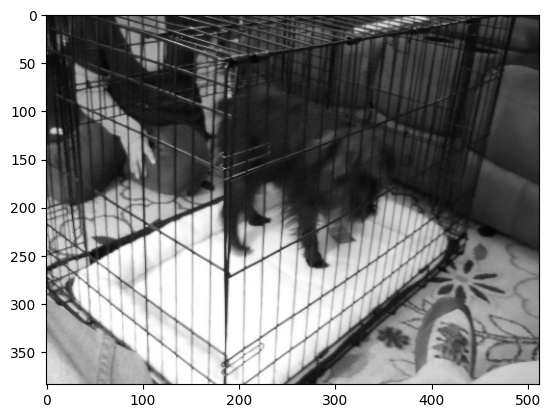

In [33]:
from detectron2.utils.visualizer import ColorMode,Visualizer
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt
import cv2




cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "/content/output/model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.25
predictor = DefaultPredictor(cfg)


image = '/content/train/images/000b97d7af0977eb.jpg'
im = cv2.imread(image)
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], scale=0.5,
               metadata=MetadataCatalog.get("dataset_train"),
               instance_mode=ColorMode.IMAGE_BW
# remove the colors of unsegmented pixels.
# This option is only available for segmentation models
)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))


plt.imshow(out.get_image())

In [34]:
outputs

{'instances': Instances(num_instances=0, image_height=768, image_width=1024, fields=[pred_boxes: Boxes(tensor([], device='cuda:0', size=(0, 4))), scores: tensor([], device='cuda:0'), pred_classes: tensor([], device='cuda:0', dtype=torch.int64), pred_masks: tensor([], device='cuda:0', size=(0, 768, 1024), dtype=torch.bool)])}